In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import math
from functools import reduce
import matplotlib 
import re
from sklearn.cluster import KMeans

#gpp.set_aesthetics(context = 'paper')


plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Arial'
})


In [2]:
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)


Pandas version: 2.0.3
Numpy version: 1.24.4


In [3]:
# 
inPath = "../Data/PrimaryLibrary/processed_z_score/"
merged_df = pd.read_csv(inPath + "inHouseDatasetsCombined.csv")
len(merged_df)

106852

In [5]:
non_ess_merged_df = merged_df[merged_df['Category'] == 'Non-essential']
figure1_outpath = '../Figure/Figure 1/Individual Figures/'

In [6]:
len(non_ess_merged_df)

45316

In [7]:
merged_df.Category.value_counts()

Category
Essential              59553
Non-essential          45316
ONE_INTERGENICO_CTL     1983
Name: count, dtype: int64

In [8]:
merged_df.columns

Index(['Target Gene Symbol', 'Category', 'TSS Position', 'sgRNA Sequence',
       'sgRNA Context Sequence', 'On-Target Efficacy Score',
       'sgRNA 'Cut' Site TSS Offset', 'TSS Bucket', 'avg_lfc_A549_Zim3',
       'z_scored_avg_lfc_A549_Zim3', 'avg_lfc_A549_Kox1',
       'z_scored_avg_lfc_A549_Kox1', 'avg_lfc_HCT116_Zim3',
       'z_scored_avg_lfc_HCT116_Zim3', 'avg_lfc_HCT116_Kox1',
       'z_scored_avg_lfc_HCT116_Kox1'],
      dtype='object')

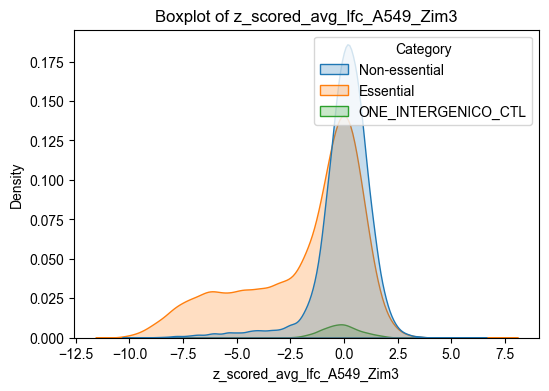

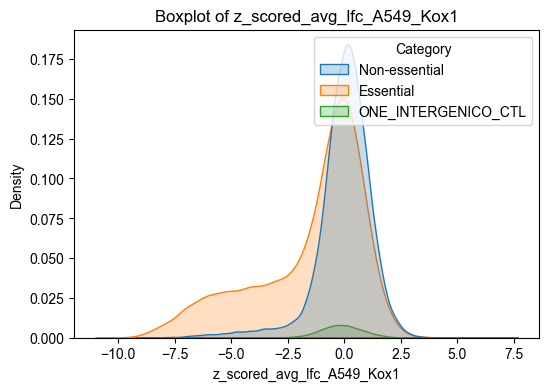

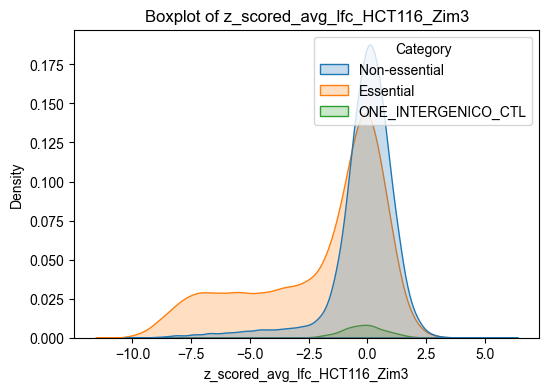

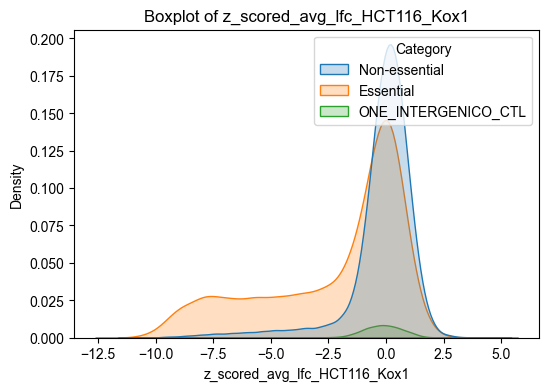

In [9]:
for var in ['z_scored_avg_lfc_A549_Zim3',
       'z_scored_avg_lfc_A549_Kox1', 
       'z_scored_avg_lfc_HCT116_Zim3',
       'z_scored_avg_lfc_HCT116_Kox1']:
    plt.figure(figsize=(6, 4))
    #sns.boxplot(merged_df, y=var, hue = 'Category')
    sns.kdeplot(data=merged_df, x=var, hue="Category", fill=True)
    plt.title(f'Boxplot of {var}')
    plt.show()

In [10]:


merged_df['all below Z -2'] = (merged_df[['z_scored_avg_lfc_A549_Zim3',
       'z_scored_avg_lfc_A549_Kox1', 
       'z_scored_avg_lfc_HCT116_Zim3',
       'z_scored_avg_lfc_HCT116_Kox1']] < -2).all(axis=1)


In [11]:

merged_df['last8_seq'] = [seq[12:20] for seq in merged_df['sgRNA Sequence']]


In [27]:
merged_df['last8_seq'].value_counts()

last8_seq
GGCGGCGG    47
GGCGGGGC    40
GGGGGAGG    32
GCCGGGCG    31
GGGCGGGG    27
            ..
TTAACCCA     1
TGGAACAG     1
CCTGCATT     1
TAACAGCA     1
GCAATGAG     1
Name: count, Length: 39238, dtype: int64

In [12]:
merged_df_noness = merged_df[merged_df['Category'] == 'Non-essential']

In [13]:
merged_df_noness['last8_seq'].value_counts()

last8_seq
GGGGGAGG    17
GGCGGCGG    16
GGGGAGGG    16
GGGGCTGG    14
TGGGGGAG    13
            ..
GACCCTTC     1
CGCACCAC     1
GGCCCAAA     1
CGGGGTTG     1
GCAATGAG     1
Name: count, Length: 26521, dtype: int64

In [14]:
merged_df_noness['z_scored_avg_lfc_A549'] = merged_df_noness.loc[:,['z_scored_avg_lfc_A549_Zim3', 'z_scored_avg_lfc_A549_Kox1']].mean(axis=1)
merged_df_noness['z_scored_avg_lfc_HCT116'] = merged_df_noness.loc[:,['z_scored_avg_lfc_HCT116_Zim3', 'z_scored_avg_lfc_HCT116_Kox1']].mean(axis=1)


/var/folders/mj/lhpd16ys0cx2wkbhm7s0nfcm0000gp/T/ipykernel_86732/1127737397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_noness['z_scored_avg_lfc_A549'] = merged_df_noness.loc[:,['z_scored_avg_lfc_A549_Zim3', 'z_scored_avg_lfc_A549_Kox1']].mean(axis=1)
/var/folders/mj/lhpd16ys0cx2wkbhm7s0nfcm0000gp/T/ipykernel_86732/1127737397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_noness['z_scored_avg_lfc_HCT116'] = merged_df_noness.loc[:,['z_scored_avg_lfc_HCT116_Zim3', 'z_scored_av

In [15]:
merged_df_noness=merged_df_noness[['Target Gene Symbol', 'Category', 'TSS Position', 'sgRNA Sequence', 'On-Target Efficacy Score',
       'sgRNA \'Cut\' Site TSS Offset', 'TSS Bucket', 'last8_seq',
       'z_scored_avg_lfc_A549', 'z_scored_avg_lfc_HCT116']]

In [16]:
merged_df_noness.last8_seq.value_counts()

last8_seq
GGGGGAGG    17
GGCGGCGG    16
GGGGAGGG    16
GGGGCTGG    14
TGGGGGAG    13
            ..
GACCCTTC     1
CGCACCAC     1
GGCCCAAA     1
CGGGGTTG     1
GCAATGAG     1
Name: count, Length: 26521, dtype: int64

In [17]:
merged_df_noness.Category.value_counts()

Category
Non-essential    45316
Name: count, dtype: int64

In [18]:

last8_seq_stat = merged_df_noness.groupby('last8_seq') \
       .agg({'last8_seq':'size', 'z_scored_avg_lfc_A549':'mean', 'z_scored_avg_lfc_HCT116': 'mean'}) \
       .rename(columns={'last8_seq':'count','z_scored_avg_lfc_A549':'mean_z_A549','z_scored_avg_lfc_HCT116':'mean_z_HCT116'}) \
       .reset_index()

In [19]:
last8_seq_stat['count'].value_counts()

count
1     16045
2      6089
3      2428
4      1053
5       423
6       229
7       108
8        62
9        38
10       20
11       16
12        3
13        3
16        2
14        1
17        1
Name: count, dtype: int64

In [20]:
import seaborn as sns


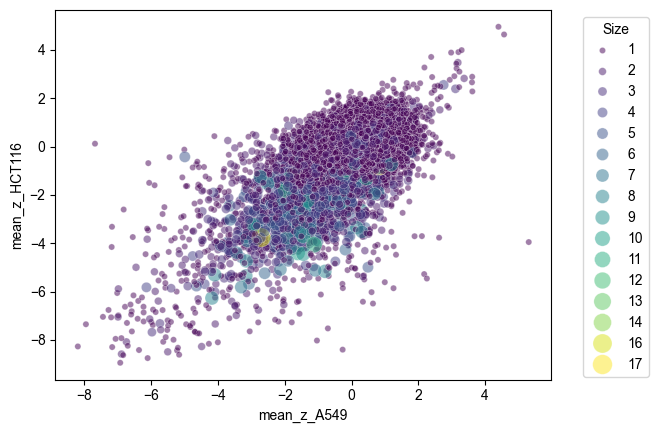

In [21]:
min, max = 20, 200
scatter = sns.scatterplot(
    data=last8_seq_stat,
    x="mean_z_A549",
    y="mean_z_HCT116",
    size="count",
    hue="count",
    alpha=0.5,
    sizes=(min, max),
    legend='full', palette='viridis'
)
handles, labels = scatter.get_legend_handles_labels()
size_legend = plt.legend(handles, labels, title='Size', bbox_to_anchor=(1.05, 1), loc='upper left')

# show the graph
plt.show()

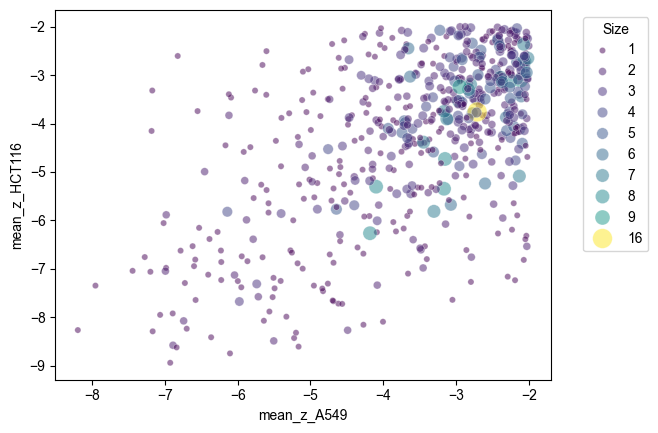

In [22]:

last8_seq_stat_selected = last8_seq_stat[(last8_seq_stat['mean_z_A549'] < -2) & (last8_seq_stat['mean_z_HCT116'] < -2)]

scatter = sns.scatterplot(
    data=last8_seq_stat_selected,
    x="mean_z_A549",
    y="mean_z_HCT116",
    size="count",
    hue="count",
    alpha=0.5,
    sizes=(min, max),
    legend='full', palette='viridis'
)
handles, labels = scatter.get_legend_handles_labels()
size_legend = plt.legend(handles, labels, title='Size', bbox_to_anchor=(1.05, 1), loc='upper left')

# show the graph
plt.show()

In [23]:
last8_seq_stat_selected.sort_values('count')

,last8_seq,count,mean_z_A549,mean_z_HCT116
13836,GACCGAAG,1,-2.154538,-4.068981
14142,GAGAGTCT,1,-3.400694,-6.801485
14120,GAGAGCTA,1,-5.657666,-6.762916
14115,GAGAGCCC,1,-2.137115,-4.176990
14057,GAGAAGCG,1,-3.688328,-3.670028
...,...,...,...,...
4244,AGGAGGAG,8,-3.163956,-5.347707
14126,GAGAGGAG,8,-4.097331,-5.304717
18020,GGGAGCTG,9,-2.947978,-3.239767
8902,CCAGGGAG,9,-2.112834,-3.105608


In [24]:
last8_seq_stat_selected['count'].value_counts()

count
1     249
2     171
3      76
4      33
5      27
7      11
6       8
8       6
9       2
16      1
Name: count, dtype: int64

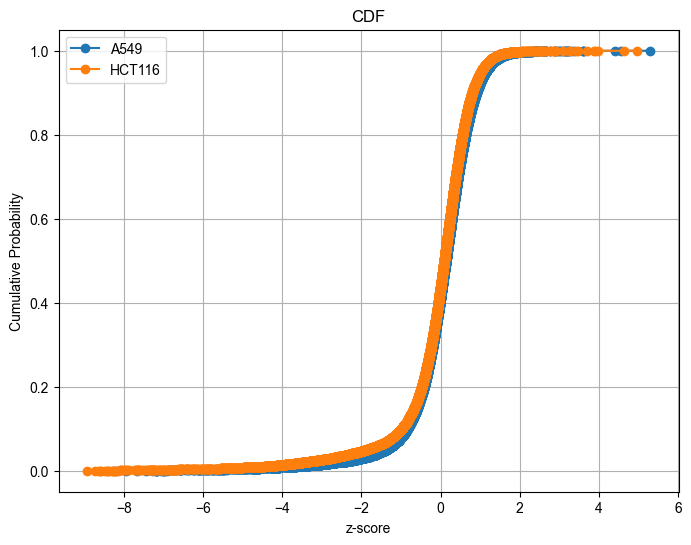

In [25]:


A549_sorted = np.sort(last8_seq_stat['mean_z_A549'])
HCT116_sorted = np.sort(last8_seq_stat['mean_z_HCT116'])

cdf_A549 = np.arange(1, len(A549_sorted) + 1) / len(A549_sorted)
cdf_HCT116 = np.arange(1, len(HCT116_sorted) + 1) / len(HCT116_sorted)

plt.figure(figsize=(8, 6))
plt.plot(A549_sorted, cdf_A549, label='A549', marker='o')
plt.plot(HCT116_sorted, cdf_HCT116, label='HCT116', marker='o')

plt.title('CDF')
plt.xlabel('z-score')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()

In [26]:

def calculate_cg_content(sequence):
    cg_count = sequence.count('C') + sequence.count('G')
    return cg_count / len(sequence)
def calculate_motif_frequency(sequence, pattern):
    matches = re.findall(pattern, sequence)
    GG_start_match = sequence.startswith("GG")
    return len(matches) + GG_start_match


In [27]:
pattern_ngg_nag = r'[ATGC]GG|[ATGC]AG'
pattern_ccn_ctn = r'CC[ATGC]|CT[ATGC]'
pattern_ngg = r'[ATGC]GG'
pattern_ccn = r'CC[ATGC]'

last8_seq_stat['NGG_NAG_Freq'] = last8_seq_stat['last8_seq'].apply(lambda seq: calculate_motif_frequency(seq, pattern_ngg_nag))
last8_seq_stat['CCN_CTN_Freq'] = last8_seq_stat['last8_seq'].apply(lambda seq: calculate_motif_frequency(seq, pattern_ccn_ctn))

last8_seq_stat['NGG_Freq'] = last8_seq_stat['last8_seq'].apply(lambda seq: calculate_motif_frequency(seq, pattern_ngg))
last8_seq_stat['CCN_Freq'] = last8_seq_stat['last8_seq'].apply(lambda seq: calculate_motif_frequency(seq, pattern_ccn))

last8_seq_stat['CG_Content'] = last8_seq_stat['last8_seq'].apply(calculate_cg_content)


In [28]:
last8_seq_stat.NGG_Freq.value_counts()

NGG_Freq
0    16140
1     8592
2     1642
3      147
Name: count, dtype: int64

In [29]:
last8_seq_stat.NGG_NAG_Freq.value_counts()

NGG_NAG_Freq
1    12406
0    10094
2     3694
3      327
Name: count, dtype: int64

In [30]:
from sklearn.preprocessing import StandardScaler

kmeans = KMeans(n_clusters=3, random_state=100, n_init=50)
scaler = StandardScaler()
scaled_last8_seq_stat = scaler.fit_transform(last8_seq_stat[['mean_z_A549', 'mean_z_HCT116', 'NGG_Freq',
       'CCN_Freq', 'CG_Content']])

In [31]:
print(np.isnan(scaled_last8_seq_stat).sum())  # Should return 0


0


In [32]:
last8_seq_stat['Cluster'] = kmeans.fit_predict(scaled_last8_seq_stat)

In [33]:
last8_seq_stat

,last8_seq,count,mean_z_A549,mean_z_HCT116,NGG_NAG_Freq,CCN_CTN_Freq,NGG_Freq,CCN_Freq,CG_Content,Cluster
0,AAAAAAAG,2,0.722446,0.109050,1,0,0,0,0.125,2
1,AAAAAAAT,1,-0.218867,-0.080190,0,0,0,0,0.000,2
2,AAAAAACA,2,0.384990,0.510273,0,0,0,0,0.125,2
3,AAAAAACC,2,-0.597037,-0.699524,0,0,0,0,0.250,2
4,AAAAAAGA,2,-0.240334,0.135338,1,0,0,0,0.125,2
...,...,...,...,...,...,...,...,...,...,...
26516,TTTGTTGA,2,1.121640,1.023113,0,0,0,0,0.250,2
26517,TTTGTTGC,2,0.116380,0.716919,0,0,0,0,0.375,2
26518,TTTGTTGT,1,0.527632,-0.720006,0,0,0,0,0.250,2
26519,TTTGTTTC,2,-0.769984,-0.332403,0,0,0,0,0.250,2


In [34]:
last8_seq_stat.Cluster.value_counts()

Cluster
2    13506
0    11472
1     1543
Name: count, dtype: int64

In [35]:
cluster_stats = last8_seq_stat[['mean_z_A549', 'mean_z_HCT116', 'NGG_Freq',
       'CCN_Freq', 'CG_Content', 'Cluster']].groupby('Cluster').mean()
cluster_stats

,mean_z_A549,mean_z_HCT116,NGG_Freq,CCN_Freq,CG_Content
Cluster,,,,,
0,0.185878,0.087591,0.692469,0.807706,0.659835
1,-2.248812,-3.117528,1.053791,0.648736,0.679439
2,0.152066,0.115988,0.203391,0.065230,0.393510


In [36]:
last8_seq_stat.CG_Content.value_counts()

CG_Content
0.500    6825
0.625    6153
0.375    5123
0.750    3576
0.250    2462
0.875    1303
0.125     759
1.000     221
0.000      99
Name: count, dtype: int64

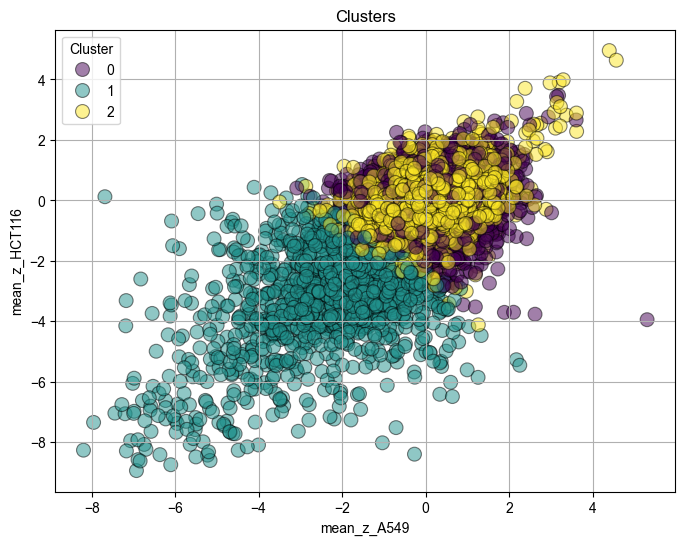

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mean_z_A549', y='mean_z_HCT116', hue='Cluster', data=last8_seq_stat, 
                palette='viridis', s=100, edgecolor='k', alpha =0.5)

plt.title('Clusters')
plt.xlabel('mean_z_A549')
plt.ylabel('mean_z_HCT116')
plt.grid(True)

plt.show()

In [38]:
from scipy.stats import ttest_ind
feature_test = 'mean_z_A549'
cluster_0 = last8_seq_stat[last8_seq_stat['Cluster'] == 0][feature_test]
cluster_1 = last8_seq_stat[last8_seq_stat['Cluster'] == 1][feature_test]

t_stat, p_value = ttest_ind(cluster_0, cluster_1)

t_stat, p_value  #

(113.03744339220673, 0.0)

In [39]:
from sklearn.decomposition import PCA


In [40]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_last8_seq_stat)

last8_seq_stat['PCA1'] = pca_components[:, 0]
last8_seq_stat['PCA2'] = pca_components[:, 1]
pca.explained_variance_ratio_

array([0.3893488 , 0.27614228])

In [41]:
sum(pca.explained_variance_ratio_)

0.6654910811330302

In [42]:
last8_seq_stat[['PCA1', 'PCA2', 'Cluster']]

,PCA1,PCA2,Cluster
0,-2.076903,1.002492,2
1,-1.848126,1.957219,2
2,-2.097274,1.012553,2
3,-0.690732,1.849586,2
4,-1.603571,1.557487,2
...,...,...,...
26516,-2.376544,0.026159,2
26517,-1.387651,0.451679,2
26518,-1.248513,1.196458,2
26519,-0.777909,1.778749,2


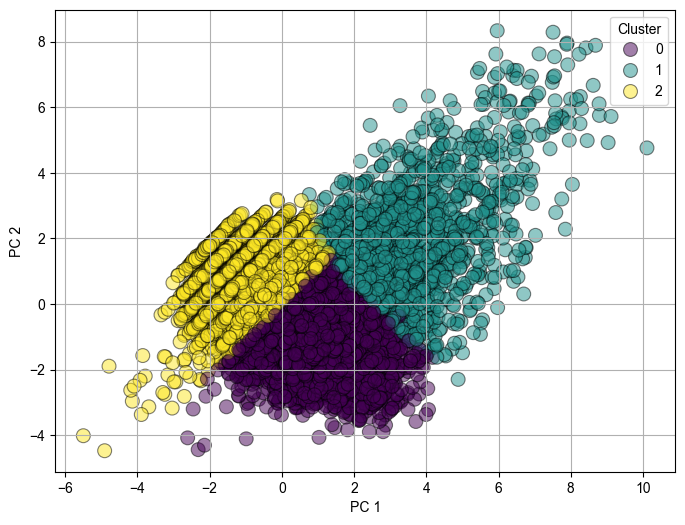

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', 
                data=last8_seq_stat, palette='viridis', s=100, edgecolor='k', alpha = 0.5)

plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.grid(True)
plt.show()


In [44]:
pca.components_

array([[-0.45905415, -0.49603614,  0.41829021,  0.34797445,  0.49715643],
       [-0.53610194, -0.4912208 , -0.25911818, -0.43889179, -0.45992238]])

In [45]:
#Features with positive loadings are positively correlated with the principal component, 
#while features with negative loadings are inversely correlated.
last8_seq_stat
#no nag

,last8_seq,count,mean_z_A549,mean_z_HCT116,NGG_NAG_Freq,CCN_CTN_Freq,NGG_Freq,CCN_Freq,CG_Content,Cluster,PCA1,PCA2
0,AAAAAAAG,2,0.722446,0.109050,1,0,0,0,0.125,2,-2.076903,1.002492
1,AAAAAAAT,1,-0.218867,-0.080190,0,0,0,0,0.000,2,-1.848126,1.957219
2,AAAAAACA,2,0.384990,0.510273,0,0,0,0,0.125,2,-2.097274,1.012553
3,AAAAAACC,2,-0.597037,-0.699524,0,0,0,0,0.250,2,-0.690732,1.849586
4,AAAAAAGA,2,-0.240334,0.135338,1,0,0,0,0.125,2,-1.603571,1.557487
...,...,...,...,...,...,...,...,...,...,...,...,...
26516,TTTGTTGA,2,1.121640,1.023113,0,0,0,0,0.250,2,-2.376544,0.026159
26517,TTTGTTGC,2,0.116380,0.716919,0,0,0,0,0.375,2,-1.387651,0.451679
26518,TTTGTTGT,1,0.527632,-0.720006,0,0,0,0,0.250,2,-1.248513,1.196458
26519,TTTGTTTC,2,-0.769984,-0.332403,0,0,0,0,0.250,2,-0.777909,1.778749


The specific sequence in the promoter that positions the pol II is called the TATA box (consensus 5′-TATAAA-3′; some variants exist). Typically, the TATA box is located 25–30 bp upstream of the transcription start site (that is, −25 to −30 bp position), and for any given gene the position of the TATA box is fixed.


In [46]:
pattern_tata = r'TATAAA'

last8_seq_stat['TATA_Freq'] = last8_seq_stat['last8_seq'].apply(lambda seq: calculate_motif_frequency(seq, pattern_tata))


In [47]:
last8_seq_stat.TATA_Freq.value_counts()

TATA_Freq
0    24208
1     2313
Name: count, dtype: int64

In [47]:
#TATA, YY1, U1 snRNP, and Long Initiator (Long Inr).
#SP, NFY, ETS, ZNF143, NRF1, and CREB